<a href="https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/PixelDrawer_Init_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pixray PixelDraw demo
Using pixray to draw pixel art.

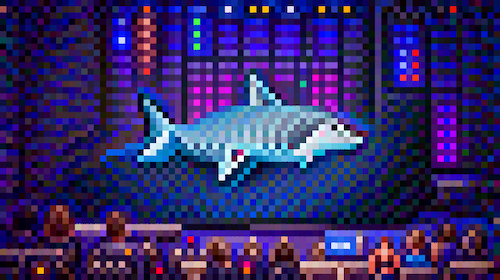
<br>
A synthwave great white shark by <a href="https://twitter.com/ViktorAlm">Viktor Alm</a>

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.

#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

# Add a gpu check
# (this can get better over time)
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, THIS IS PROBABLY NOT ENOUGH <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf pixray
  !git clone https://github.com/dribnet/pixray
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

output.clear()
import sys
sys.path.append("pixray")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

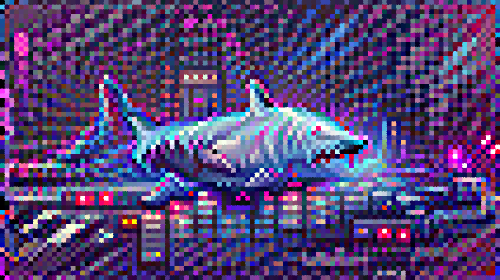

iter: 300, finished (-5=>1.984)


In [2]:
#@title Settings

#@markdown Enter a description of what you want to draw - I usually add #pixelart to the prompt.
#@markdown The renderer can also be swapped with other models such
#@markdown as VQGAN or CLIPDraw. <br>

prompts = "A great white shark. Amazing synthwave #pixelart" #@param {type:"string"}

init_image = "https://pbs.twimg.com/media/E9GszX4XoAo7Z2-?format=png&name=900x900" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

drawer = "pixel" #@param ["vqgan", "pixel"]

iterations = 300 #@param {type:"slider", min:50, max:500, step:50 }

display_clear = True #@param {type:"boolean"}

#@markdown (these two are valid only when drawer is "pixel")

pixel_scale = 0.75 #@param {type:"slider", min:0.25, max:2.0, step:0.25}

pixel_type = "rect" #@param ["rect", "rectshift", "hex", "tri", "diamond"]


#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.

#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.


#@markdown
#@markdown *Advanced: you can also edit this cell and add add additional
#@markdown settings, combining settings from different notebooks.*


# Simple setup
import pixray

# these are good settings for pixeldraw
pixray.reset_settings()
pixray.add_settings(prompts=prompts, aspect=aspect)
pixray.add_settings(quality="better", scale=2.5, init_image=init_image)
pixray.add_settings(iterations=iterations, display_clear=display_clear)
pixray.add_settings(drawer=drawer)
if drawer == "pixel":
  pixray.add_settings(pixel_scale=pixel_scale, pixel_type=pixel_type)

# removed text
pixray.add_settings(vector_prompts="textoff")

#### YOU CAN ADD YOUR OWN CUSTOM SETTING HERE ####
# this is the example of how to run longer with less frequent display
# pixray.add_settings(iterations=500, display_every=50)

settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
